<a href="https://colab.research.google.com/github/Jeyaa-NKS/NLP-based-Recommendation-System/blob/main/NLP_based_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/Medicine_Details.csv')
data.head()

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,Cadila Pharmaceuticals Ltd,34,37,29


In [48]:
# Data Summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Manufacturer        11825 non-null  object
 5   Excellent Review %  11825 non-null  int64 
 6   Average Review %    11825 non-null  int64 
 7   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 739.2+ KB
None


In [50]:
print(data.describe())

       Excellent Review %  Average Review %  Poor Review %
count        11825.000000      11825.000000   11825.000000
mean            38.516025         35.756364      25.727611
std             25.225343         18.268134      23.991985
min              0.000000          0.000000       0.000000
25%             22.000000         27.000000       0.000000
50%             34.000000         35.000000      22.000000
75%             51.000000         47.000000      35.000000
max            100.000000         88.000000     100.000000


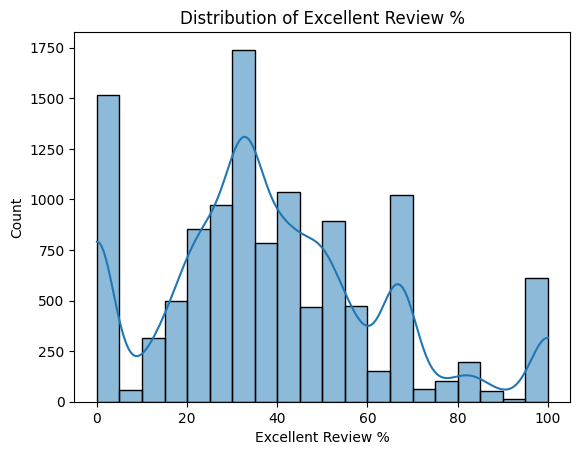

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['Excellent Review %'], bins=20, kde=True)
plt.title('Distribution of Excellent Review %')
plt.show()

<ipython-input-53-566a250fbad5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


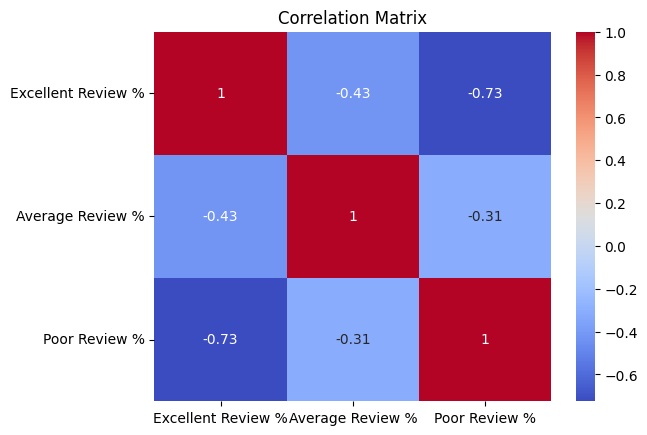

In [53]:
# Correlation Analysis (for numerical features)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

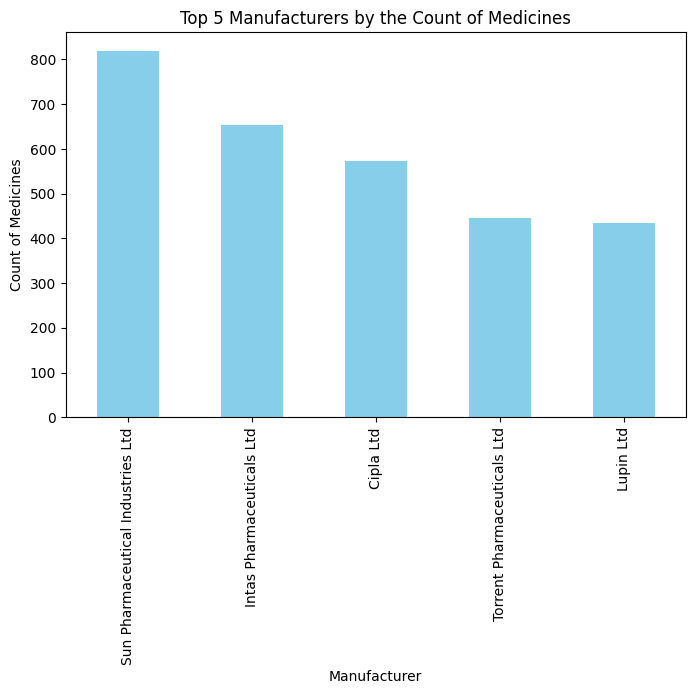

In [65]:
import pandas as pd
import matplotlib.pyplot as plt



# Get the top 5 manufacturers by the count of medicines
top_manufacturers = data['Manufacturer'].value_counts().head(5)

# Create a bar chart for the top 5 manufacturers
plt.figure(figsize=(8, 5))
top_manufacturers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Manufacturers by the Count of Medicines')
plt.xlabel('Manufacturer')
plt.ylabel('Count of Medicines')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


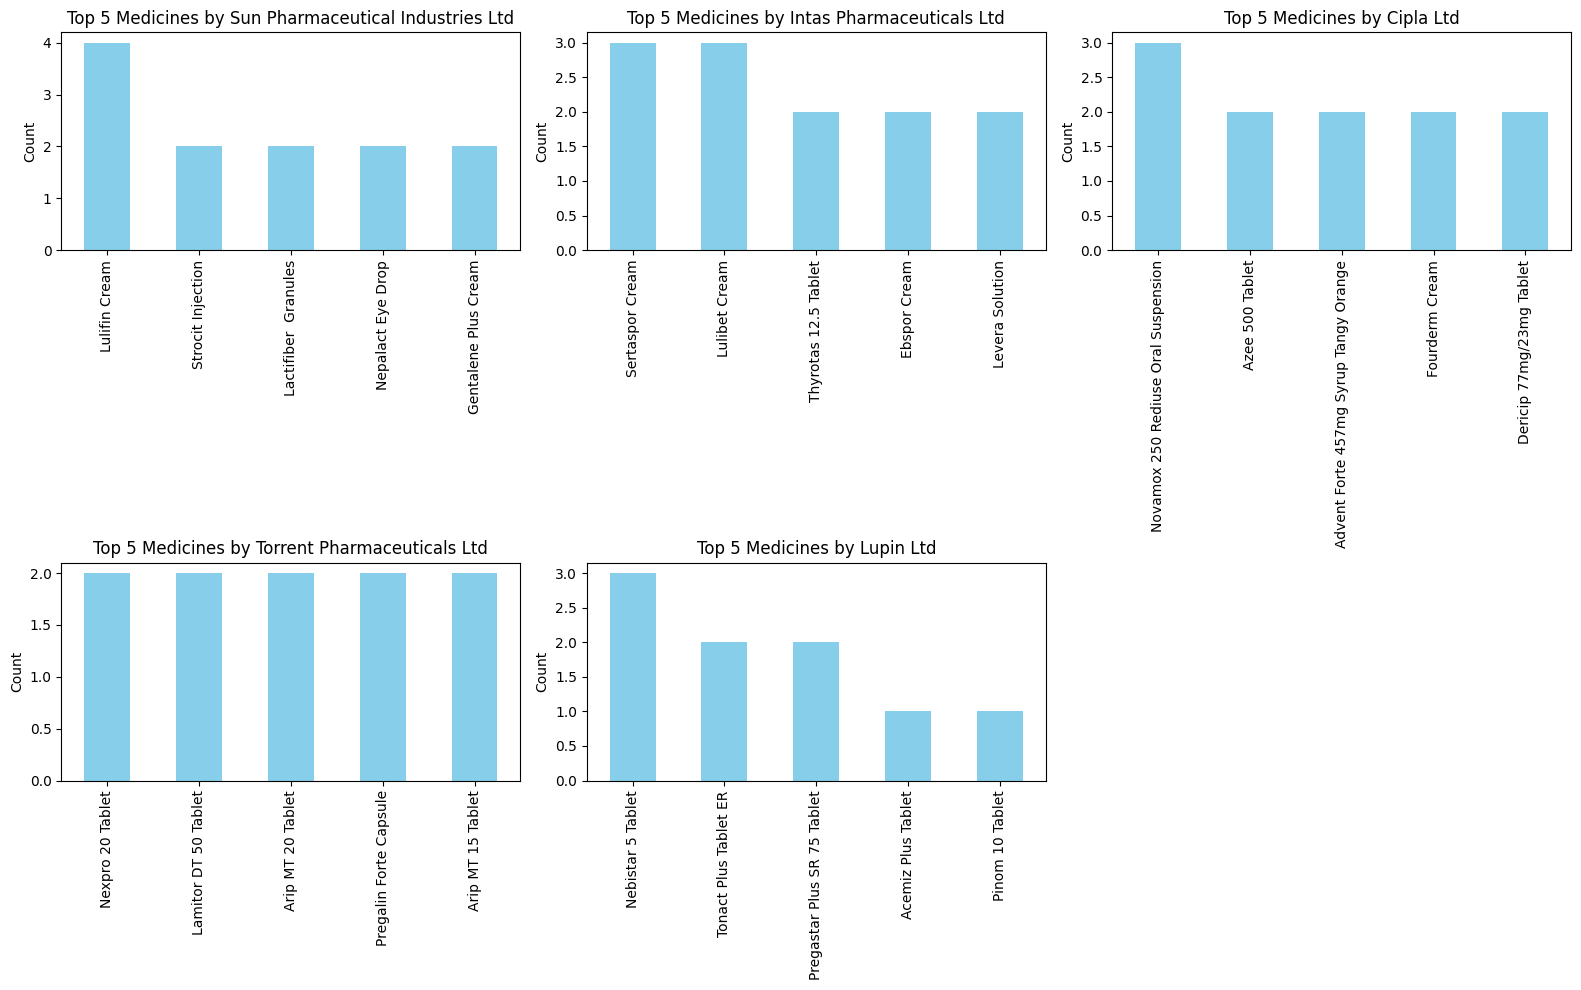

In [77]:


top_manufacturers = data['Manufacturer'].value_counts().head(5).index

top_5_medicines_dataframes = []

for manufacturer in top_manufacturers:
    manufacturer_data = data[data['Manufacturer'] == manufacturer]
    top_5_medicines_dataframes.append(manufacturer_data['Medicine Name'].value_counts().head(5))


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for i, manufacturer in enumerate(top_manufacturers):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    top_5_medicines_dataframes[i].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Top 5 Medicines by {manufacturer}')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x',rotation = 90)


for i in range(len(top_manufacturers), 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

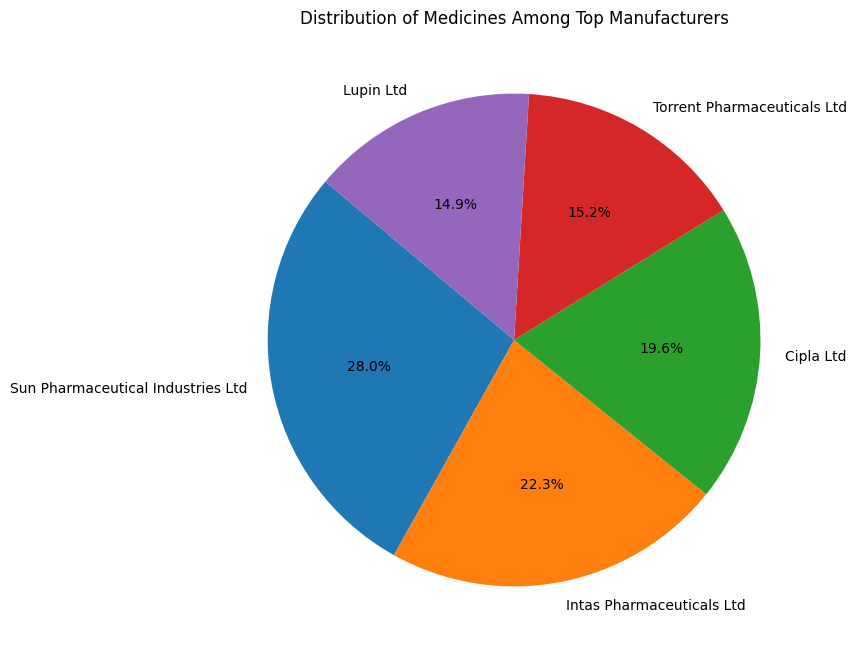

In [78]:
# Create a pie chart to show the distribution of medicines among the top manufacturers
top_manufacturers = data['Manufacturer'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_manufacturers, labels=top_manufacturers.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medicines Among Top Manufacturers')
plt.show()

In [18]:
#Data Preprocessing
df = pd.DataFrame(data, columns=['Medicine Name', 'Uses', 'Side_effects'])
df.head()

,Medicine Name,Uses,Side_effects
0,Avastin 400mg Injection,Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...
1,Augmentin 625 Duo Tablet,Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...
2,Azithral 500 Tablet,Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea
3,Ascoril LS Syrup,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...
4,Aciloc 150 Tablet,Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance


In [20]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization: Split text into words
    words = word_tokenize(text)

    # Remove punctuation and non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text


# Preprocess the columns
df['Medicine Name'] = df['Medicine Name'].apply(preprocess_text)
df['Uses'] = df['Uses'].apply(preprocess_text)
df['Side_effects'] = df['Side_effects'].apply(preprocess_text)

# Print the preprocessed DataFrame
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              Medicine Name  \
0   avastin 400mg injection   
1  augmentin 625 duo tablet   
2       azithral 500 tablet   
3          ascoril ls syrup   
4         aciloc 150 tablet   

                                         Composition  \
0                                Bevacizumab (400mg)   
1    Amoxycillin  (500mg) +  Clavulanic Acid (125mg)   
2                               Azithromycin (500mg)   
3  Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...   
4                                 Ranitidine (150mg)   

                                                Uses  \
0  cancer colon rectum cell lung cancer kidney ca...   
1                     treatment bacterial infections   
2                     treatment bacterial infections   
3                              treatment cough mucus   
4  treatment gastroesophageal reflux disease acid...   

                                        Side_effects  \
0  rectal bleeding taste change headache noseblee...   
1  vomiting nausea diarrhea

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display

df['Text'] = df['Uses'] + ' ' + df['Side_effects']


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

#User profile
user_profile_text = "Treatment of heart failure"
user_profile_vector = tfidf_vectorizer.transform([user_profile_text])

cosine_sim = cosine_similarity(user_profile_vector, tfidf_matrix)

medicines_indices = cosine_sim.argsort()[0][::-1]

# Top-N Recommendations
N = 5
top_N_recommendations = df.iloc[medicines_indices[:N]]

# Get the cosine similarity values for the top recommendations
cosine_sim_values = cosine_sim[0][medicines_indices[:N]]

recommendations_with_scores = top_N_recommendations.copy()
recommendations_with_scores['Cosine Similarity'] = cosine_sim_values

recommendations_with_scores = recommendations_with_scores.sort_values(
    by='Excellent Review %', ascending=False)

recommendations_with_scores.reset_index(drop=True, inplace=True)
recommendations_with_scores.index = recommendations_with_scores.index + 1

selected_columns = ['Medicine Name', 'Composition', 'Excellent Review %', 'Average Review %', 'Poor Review %', 'Cosine Similarity']

display(recommendations_with_scores[selected_columns])


,Medicine Name,Composition,Excellent Review %,Average Review %,Poor Review %,Cosine Similarity
1,isorus tablet,Isosorbide Dinitrate (20mg) + Hydralazine (37....,67,33,0,0.904640
2,muzika tablet,Isosorbide Dinitrate (20mg) + Hydralazine (37....,42,33,25,0.904640
3,isolazine tablet,Isosorbide Dinitrate (20mg) + Hydralazine (37....,10,47,43,0.904640
4,apresol plus tablet,Isosorbide Dinitrate (20mg) + Hydralazine (37....,0,0,100,0.904640
5,fimanta 120 tablet,Fimasartan (120mg),0,0,100,0.584769
